# Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [59]:
data = pd.read_csv('train.csv')
data_copy = pd.read_csv('train.csv')

In [ ]:
# Which data values are null?
data.isnull().sum()

#LotFrontage       259
#Electrical          1
#MasVnrType          8
#MasVnrArea          8
#Alley            1369
#BsmtQual           37
#BsmtCond           37
#BsmtExposure       38
#BsmtFinType1       37
#BsmtFinType2       38
#FireplaceQu       690
#GarageType         81
#GarageYrBlt        81
#GarageFinish       81
#GarageQual         81
#GarageCond         81
#PoolQC           1453
#Fence            1179
#MiscFeature      1406

In [60]:
# Some variables have so many missing values that they are not useful for the study and need to be dropped
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

### Electrical

In [61]:
#Electrical has the following values
#       SBrkr	Standard Circuit Breakers & Romex
#       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#       Mix	Mixed

# Electrical only has 1 missing data point. For the row with missing electrical value, are there any other missing
# values?
np.unique(data[data['Electrical'].isnull()==True].isnull().any(axis=0).tolist(), return_counts=True)
# Results below suggest that all other 75 values in the row of data are not null, and that only 'Electrical'
# is missing for this row of data

(array([False,  True], dtype=bool), array([75,  1], dtype=int64))

In [62]:
# There are 3 choices with regard to dealing with missing data points: 
# 1. discard the row
# 2. Replace with the median value or 
# 3. take the best guess with the value. 
# It is difficult to guess the value (may need to regress Electrical against rest of values to determine the closest value
# and replacing with the median has the risk of not representing the true value, although this might not affect results that
# much as this is only one value.)

# Since it is just 1 row of data, we will drop the row
data = data[data['Electrical'].isnull()==False]

### Lot Frontage (linear feet of street connected to property)

In [63]:
# LotFrontage: Linear feet of street connected to property
# For LotFrontage, we will assume that if it is NaN, then there is 0 feet of property connected to the street
data['LotFrontage'].fillna(0, inplace=True)

### Masonry

In [64]:
# Has 8 missing values. For rows where veneer type is NaN, is Veneer Area missing also? If so, then we can 
data[data['MasVnrType'].isnull()==True]['MasVnrArea']
# The below results show this is true

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [65]:
# Check that for instances where MasVnrType is none, the MasVnrArea is 0.
data[data['MasVnrType']=='None']['MasVnrArea'].value_counts(dropna=False)
# The below results show this is true most of the time, but there are some exceptions.

0.0      858
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64

In [66]:
# Correct data quality issue: Replace MasVnrArea with 0 when MasVnrType is None
data.loc[(data['MasVnrType'] == "None") & (data['MasVnrArea']!=0), 'MasVnrArea'] = 0

In [67]:
# Check that data quality issue has been corrected
data[data['MasVnrType']=='None']['MasVnrArea'].value_counts(dropna=False)

0.0    863
Name: MasVnrArea, dtype: int64

In [68]:
# Fill missing values for MasVnrType with "none"
data['MasVnrType'].fillna("None", inplace=True)

# Fill missing values for MasVnrArea with 0
data['MasVnrArea'].fillna(0, inplace=True)

### Basement
Here are all the basement-related variables: BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinSF2, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtUnfSF

In [24]:
# What are the values of basement variables when BsmtExposure is missing?
data[data['BsmtExposure'].isnull()==True][['BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 
                                      'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF']]

,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF
17,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
39,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
90,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
102,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
156,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
182,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
259,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
342,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
362,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0
371,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0


When BsmtExposure is missing, the value is either missing or 0 for other basement-related variables. There is one row, row 948, where the basement is unfinished.

In [25]:
# How many basements are unfinished?
data['BsmtFinType1'].value_counts(dropna=False)

Unf    429
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [29]:
# What are the values for other basement variables when a basement is unfinished?
data[data['BsmtFinType1']=='Unf'][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 
                                      'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF']].head(10)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF
8,TA,TA,No,0,Unf,Unf,0,0,TA,952
13,Gd,TA,Av,0,Unf,Unf,0,0,Gd,1494
15,TA,TA,No,0,Unf,Unf,0,0,TA,832
20,Ex,TA,Av,0,Unf,Unf,0,0,Ex,1158
21,TA,TA,No,0,Unf,Unf,0,0,TA,637
22,Gd,TA,No,0,Unf,Unf,0,0,Gd,1777
25,Gd,TA,No,0,Unf,Unf,0,0,Gd,1566
29,TA,TA,No,0,Unf,Unf,0,0,TA,520
30,TA,TA,No,0,Unf,Unf,0,0,TA,649
31,TA,TA,No,0,Unf,Unf,0,0,TA,1228


In [31]:
# It looks like basement exposure should not be null for unfinished basements.
# How many BsmtFinType1 values are null when BsmtExposure is null?
data[data['BsmtFinType2']=='Unf']['BsmtExposure'].value_counts(dropna=False)

No     849
Av     196
Gd     113
Mn      96
NaN      1
Name: BsmtExposure, dtype: int64

In [69]:
# Only 1 row has BsmtExposure as null when the basement is unfinished.
# Drop this row
data = data.drop(data.index[np.where((data['BsmtFinType2']=='Unf') & (data['BsmtExposure'].isnull()))])

In [35]:
# For basements that are unfinished (BsmtUnfSF is not 0), what do the other basement data points look like?
data[data['BsmtUnfSF']>0][['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 
     'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF']].isnull().sum()

BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFinType1    0
BsmtFinType2    1
BsmtFullBath    0
BsmtHalfBath    0
BsmtQual        0
BsmtUnfSF       0
dtype: int64

In [70]:
# If a basement is unfinished, most basement variables still do not have missing values.
# Drop rows where basement exposure and basement Fin Type 2 variables are null
data = data.drop(data.index[np.where((data['BsmtUnfSF']>0) & (data['BsmtExposure'].isnull() | data['BsmtFinType2'].isnull()))])

In [71]:
# Create variable indicating whether the house has a basement or not.
# If BsmtCond is null, then assume house does not have a basement
data['HasBsmt'] = 1
# If the basement condition is missing, then we assume that the house does not have a basement:
data.loc[data['BsmtCond'].isnull(), 'HasBsmt'] = 0

In [72]:
data.shape # 3 rows have been dropped so far

(1457, 77)

### Garage

In [39]:
# It appears that 81 houses do not have garages
data[data['GarageCond'].isnull()][['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt']].isnull().sum()

GarageCond      81
GarageFinish    81
GarageQual      81
GarageType      81
GarageYrBlt     81
dtype: int64

In [84]:
# What is distribution of garage year built in original data?
data_copy['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [73]:
#Replace NA with NoGarage for Garage-Related Variables
data.loc[data['GarageCond'].isnull(), 'GarageCond'] = "NoGarage"
data.loc[data['GarageFinish'].isnull(), 'GarageFinish'] = "NoGarage"  
data.loc[data['GarageQual'].isnull(), 'GarageQual'] = "NoGarage"         
data.loc[data['GarageType'].isnull(), 'GarageType'] = "NoGarage"         
#data.loc[data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0    

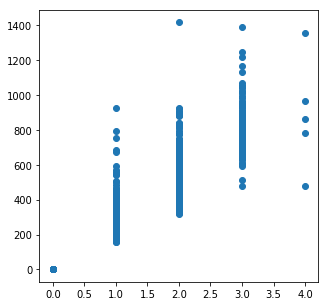

In [74]:
# Do we need both Garage Cars and Garage Area? How are they correlated with each other?
fig = plt.figure(figsize=(5, 5))

plt.scatter(data['GarageCars'], data['GarageArea'])
plt.show()

Text(0,0.5,'Sale Price')

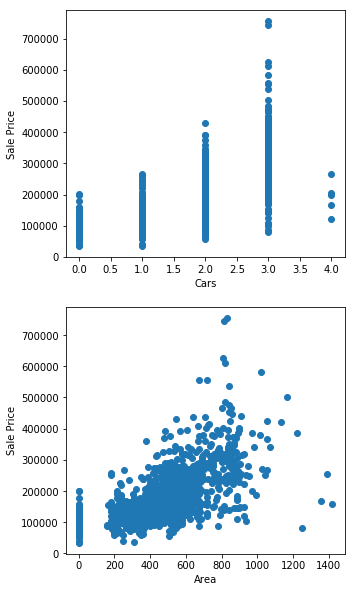

In [42]:
# Are the efects of Garage Cars and Garage Area have similar correlation with Sale Price?
fig = plt.figure(figsize=(5, 10))
axplot1 = fig.add_subplot(2, 1, 1)
axplot1.scatter(data['GarageCars'], data['SalePrice'])
axplot1.set_xlabel('Cars')
axplot1.set_ylabel('Sale Price')

axplot2 = fig.add_subplot(2, 1, 2)
axplot2.scatter(data['GarageArea'], data['SalePrice'])
axplot2.set_xlabel('Area')
axplot2.set_ylabel('Sale Price')

In [43]:
# We will keep both for now and let regularization take care of this

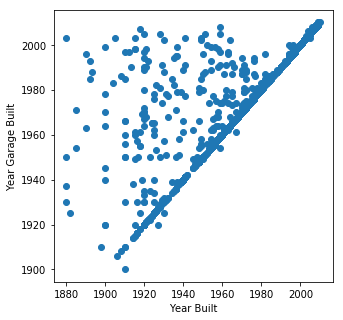

In [75]:
# For houses with missing values for year the garage was built, fill in the year with the year entire house was built
# The graph below shows that most garages were built the same time as the houses, with some garages built later than the house

plt.figure(figsize=(5, 5))
plt.scatter(data['YearBuilt'], data['GarageYrBlt'])
plt.xlabel('Year Built')
plt.ylabel('Year Garage Built')
plt.show()

In [77]:
# Impute GarageYrBlt: wherever GarageYrBlt is null or 0, replace it with the year the house was built
data.loc[(data['GarageYrBlt']==0)|(data['GarageYrBlt'].isnull()), 'GarageYrBlt'] = data['YearBuilt']

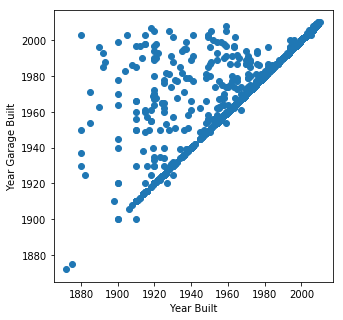

In [78]:
# Check out new distribution
plt.figure(figsize=(5, 5))
plt.scatter(data['YearBuilt'], data['GarageYrBlt'])
plt.xlabel('Year Built')
plt.ylabel('Year Garage Built')
plt.show()

We have a few cases where the house was built very early on (before 1880) and never had a garage. The GarageYrBlt for these houses became 1880 also, even though logically, there would be no garages during that time. However, there are such few occurrences that this should not affect the analysis.

### Living Area

In [85]:
# Check that 1st Flr Living Area + 2nd Flr Living Area = GrLivingArea
data['GrLivArea2'] = data['1stFlrSF']+data['2ndFlrSF']
data[data['GrLivArea2']!=data['GrLivArea']][['GrLivArea2', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 
    'MSSubClass']]

,GrLivArea2,GrLivArea,1stFlrSF,2ndFlrSF,TotalBsmtSF,MSSubClass
51,816,1176,816,0,816,50
88,1013,1526,1013,0,1013,50
125,520,754,520,0,520,190
170,854,1382,854,0,720,50
185,3036,3608,1518,1518,1107,75
187,1512,1656,808,704,660,50
197,2720,3112,1360,1360,1360,75
198,1858,2229,929,929,755,75
263,926,1316,926,0,926,50
267,1772,2192,1052,720,720,75


In [86]:
data[data['GrLivArea2']!=data['GrLivArea']].shape
# 26 observations have the total General Living Area not equal to 1st Flr Area + 2nd Flr Area.
# Upon examination of these data rows, the General Living Area in the data is greater than the living area calculated.
# The GrLivArea does not seem to include the basement area, because adding that would produce a sum
# greater than the general living area in the data. 
# There may be some data quality issues, so we'll use solely GrLivArea to get rid of the inconsistency 

(26, 78)

In [87]:
data = data.drop(['1stFlrSF', '2ndFlrSF'], axis=1)

### Bathrooms

In [88]:
data['BsmtBaths'] = data['BsmtFullBath']+data['BsmtHalfBath']
data['Baths'] = data['FullBath']+data['HalfBath']

data = data.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

### Porch

Text(0,0.5,'Sale Price')

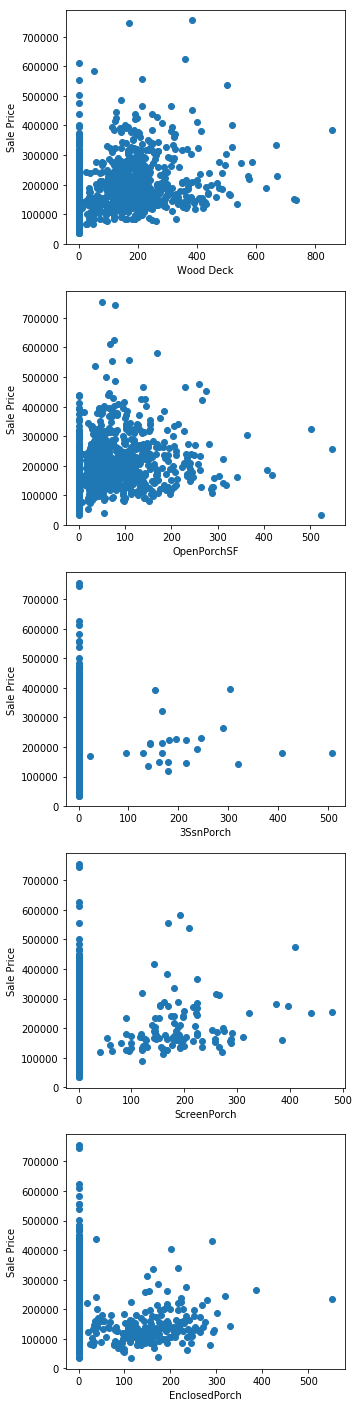

In [89]:
# Porch Area - how do each of the porch areas vary with Sale Price?
# From the graphs, it looks like the more proches of each type below that the property has, 
# the higher the Sale Price
fig = plt.figure(figsize=(5, 25))

axplot1 = fig.add_subplot(5, 1, 1)
axplot1.scatter(data['WoodDeckSF'], data['SalePrice'])
axplot1.set_xlabel('Wood Deck')
axplot1.set_ylabel('Sale Price')

axplot2 = fig.add_subplot(5, 1, 2)
axplot2.scatter(data['OpenPorchSF'], data['SalePrice'])
axplot2.set_xlabel('OpenPorchSF')
axplot2.set_ylabel('Sale Price')

axplot3 = fig.add_subplot(5, 1, 3)
axplot3.scatter(data['3SsnPorch'], data['SalePrice'])
axplot3.set_xlabel('3SsnPorch')
axplot3.set_ylabel('Sale Price')

axplot4 = fig.add_subplot(5, 1, 4)
axplot4.scatter(data['ScreenPorch'], data['SalePrice'])
axplot4.set_xlabel('ScreenPorch')
axplot4.set_ylabel('Sale Price')

axplot5 = fig.add_subplot(5, 1, 5)
axplot5.scatter(data['EnclosedPorch'], data['SalePrice'])
axplot5.set_xlabel('EnclosedPorch')
axplot5.set_ylabel('Sale Price')

In [90]:
# Create variable just indicating whether the property has a proch or not
# Create variable 
data['zeros'] = 0
data['HasPorch'] = 0
data.loc[((data['WoodDeckSF']>data['zeros']) | (data['OpenPorchSF']>data['zeros']) | (data['3SsnPorch']>data['zeros']) | 
        (data['ScreenPorch']>data['zeros']) | (data['EnclosedPorch']>data['zeros'])), 'HasPorch'] = 1  

data['TotalPorchArea'] = data['WoodDeckSF'] + data['OpenPorchSF'] + data['3SsnPorch'] + data['ScreenPorch'] + data['EnclosedPorch']

In [91]:
# Drop unneeded variables

data = data.drop(['BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea2', 'zeros', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'EnclosedPorch'], 
    axis = 1)

In [96]:
# Check variables that still have missing values
data.isnull().sum().sum()

111

In [99]:
x = data.isnull().sum()!=0

In [102]:
x[x==True]

BsmtQual        True
BsmtCond        True
BsmtExposure    True
dtype: bool

In [103]:
# The above var's still have missing values